In this notebook I fit the microburst low Earth orbit Probability Density Function (PDF) with a variety of models. The optimizer is pymc3.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import pymc3 as pm
import theano.tensor as tt

### Define a model
First lets code up a Maxwell (Maxwell-Boltzmann) distribution.

In [25]:
def maxwell(x, a):
    """ 
    Defines a Maxwell (otherwise known as 
    Maxwell-Boltzman or Maxwellian for plasmas) 
    PDF. Independent model parameter is a. 
    The distribution is evaluated at points
    given by array x. Interesting that I did 
    not have to define theano tensor variables
    beforehand i.e. a = tt.scalar('a') and
    x = tt.vector('x') is not necessary.
    """
    inner = -x**2/(2*a**2)
    pdf = np.sqrt(2/np.pi)*(x**2/a**3)*tt.exp(inner)
    return pdf

Now confirm that our theno representation of a Maxwell distribution is the same as other sources e.g. wikipedia.

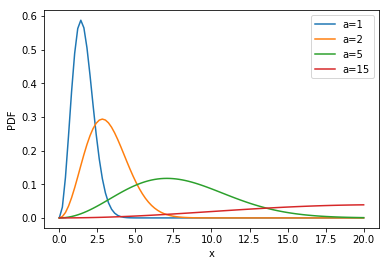

In [26]:
for a_i in [1, 2, 5, 15]:
    x = np.linspace(0, 20, num=100)
    y = maxwell(x, a_i)
    plt.plot(x, y.eval(), label=f'a={a_i}')
plt.legend()
plt.ylabel('PDF'); plt.xlabel('x');

## MCMC model
First lets fit artificial data to confirm that everything works as expected

In [50]:
norm_std = 0.01

def model(x, y):
    """ 
    Define a pymc3 model
    """
    with pm.Model() as model:
        # Very simple model!
        a = pm.Uniform('a', lower=0, upper=20)
        y_test = maxwell(x, a)
        # Likelihood
        c_m = pm.Normal('c_m', mu=y_test, sd=norm_std, observed=y)
        trace = pm.sample(int(1E4)) # chains=1000, step=pm.SMC()
    return trace, c_m

Now run the MCMC model to fit the test PDF.

In [56]:
a_test = 5
x = np.arange(0, 100, 5)
y = maxwell(x, a_test).eval()
y_data = np.array([np.random.normal(loc=y_i, scale=norm_std) for y_i in y])
y_data[y_data < 0] = 0

In [52]:
trace, c_m = model(x, y_data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5533.32draws/s]


Now validate this model to check if it did the right thing!

In [88]:
print(f'True a = {a_test}')

True a = 5


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,4.92742,0.215955,0.001721,4.520443,5.369804,16219.464436,1.000152


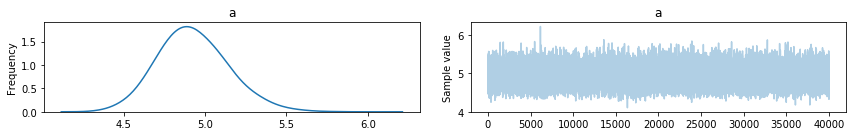

In [85]:
pm.traceplot(trace, combined=True);
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a,4.92742,0.215955,0.001721,4.520443,5.369804,16219.464436,1.000152


In [63]:
c_m.eval()

array([0.00033056, 0.09612961, 0.07774128, 0.010673  , 0.0036074 ,
       0.00678232, 0.        , 0.01047884, 0.        , 0.        ,
       0.00086752, 0.        , 0.        , 0.        , 0.        ,
       0.00253996, 0.01270517, 0.        , 0.        , 0.        ])

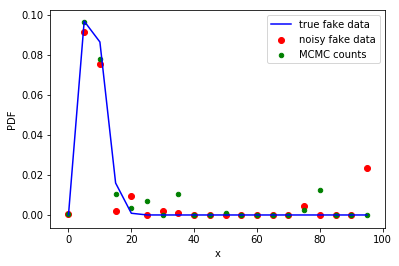

In [78]:
plt.plot(x, y, c='b', label='true fake data')
plt.scatter(x, y_data, c='r', label='noisy fake data');
plt.scatter(x, c_m.eval(), c='g', s=20, label='MCMC counts');
plt.legend(); plt.xlabel('x'); plt.ylabel('PDF');

In [ ]:
with pm.Model() as model:
    # Very simple model!
    a = pm.Uniform('a', lower=0, upper=100)
    # Evaluate the model and convert to counts.
    mu = maxwell(a, t)
    #print(mu.eval())
    # Likelihood
    c_m = pm.Poisson('c_m', mu=mu, observed=data)
    trace = pm.sample(int(1E4), chains=1000) # step=pm.SMC()

In [ ]:
First, lets load a cdf/pdf dataset that I've generated in the ./../stats/microburst_CDF.ipynb